In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

In [36]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

# Standardize features
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

# Create MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000) # 3 hidden layers with 10 neurons each

# Train the model
mlp.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = mlp.predict(X_test)

In [42]:
# get the mean activations for each label for each neuron
activations = mlp.coefs_
print(activations)

# gt the bias for each neuron
bias = mlp.intercepts_
print(bias)

# get the number of layers
layers = mlp.n_layers_
print(layers)

# define mean_label_activation as the mean activation of each label for each neuron
mean_label_activation = []
for i in range(len(activations)):
    mean_label_activation.append(activations[i].mean(axis=1))


[array([[ 0.48578029, -0.73293227, -0.45918178, -0.07621296,  0.67191311,
         0.5621195 , -0.11083123, -0.51028816, -0.38330831,  0.09956014],
       [-0.23592181,  0.36809695, -0.27771033, -0.19230822,  0.01139038,
        -0.30196108,  0.5252049 ,  0.23812394,  0.43026012, -0.18593967],
       [-0.61132981, -0.02772776, -0.83413647,  0.97288556,  0.21595672,
        -0.04361931,  0.20623173, -0.61840534, -0.1895479 ,  1.00905428],
       [-0.42155447,  0.14133832, -0.1968509 ,  0.47938495,  0.08599249,
         0.17443349, -0.8718286 , -0.39653425, -0.44931183,  0.17687055]]), array([[ 1.77441881e-01, -1.32294366e-02,  7.38455460e-01,
        -4.70752166e-01, -7.94209280e-03,  3.25228925e-03,
         6.84338309e-01,  4.08046454e-01, -5.91875853e-01,
         5.49025946e-02],
       [ 3.30437299e-01, -4.96365699e-02,  2.43486970e-01,
         1.21258228e-01, -1.71912593e-01,  2.09806386e-01,
        -6.55358289e-01,  4.54411055e-01, -1.97735587e-01,
        -6.61755271e-01],
   

In [47]:
mean_label_activation[0:]

[array([-0.04533817,  0.03792352,  0.00793617, -0.12780602]),
 array([ 0.09826374, -0.03769984,  0.14336282,  0.07730781,  0.1900479 ,
         0.03018597,  0.2250177 , -0.02806459,  0.07722397,  0.26881757]),
 array([ 0.24277555, -0.00780149,  0.41346583, -0.05804398, -0.02044648,
        -0.11856551,  0.0320879 ,  0.19092127, -0.20652729,  0.28687352]),
 array([ 0.24905568, -0.19768297,  0.21595109, -0.30538918,  0.1526483 ,
         0.54613769, -0.24123937, -0.25458736,  0.30568766,  0.28135463])]

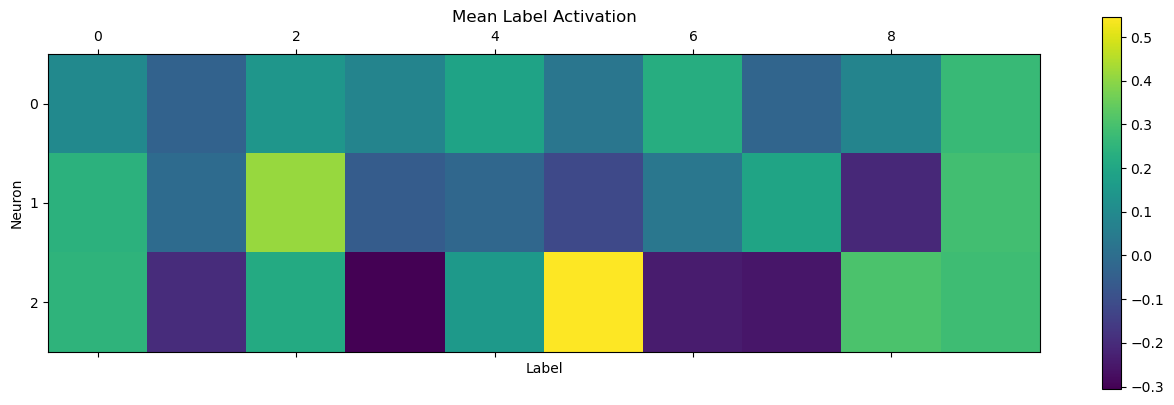

In [48]:
# plot the activations
plt.matshow(mean_label_activation[1:])
plt.title('Mean Label Activation')
plt.colorbar()
plt.ylabel('Neuron')
plt.xlabel('Label')
plt.show()

<Figure size 200x200 with 0 Axes>

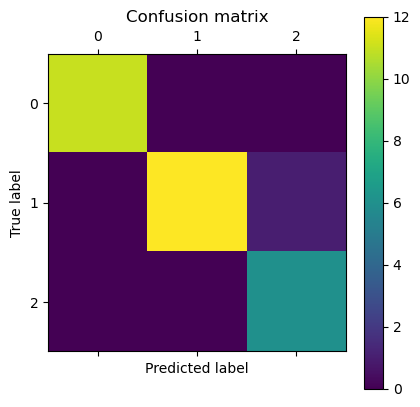

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Training set score: 0.991667


In [35]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


print(classification_report(y_test, y_pred)) 
print("Training set score: %f" % mlp.score(X_train, y_train))